<a href="https://colab.research.google.com/github/elijahkinghernandez/DATASCI112-Final-Project/blob/main/3_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df_ml = pd.read_csv('/content/H117 - Final Project - df_ml')
df_ml

,rollnumber,icpsr,cast_code,prob,bioname,district_code,party_code,age elected,economic lib-con,vote_desc,vote_question,vote_result,date,yea_count,nay_count,gender,race,immigrant
0,3,20104.0,yea,100.0,"SCHIFF, Adam",28,100,60,-0.350,Adopting the Rules of the House of Representat...,On Motion to Table the Motion to Postpone to a...,1,2021-01-04,214,204,1,white,0
1,4,20104.0,yea,100.0,"SCHIFF, Adam",28,100,60,-0.350,Adopting the Rules of the House of Representat...,Table Motion to Refer,1,2021-01-04,214,196,1,white,0
2,5,20104.0,yea,100.0,"SCHIFF, Adam",28,100,60,-0.350,Adopting the Rules of the House of Representat...,On Ordering the Previous Question,1,2021-01-04,217,204,1,white,0
3,6,20104.0,nay,100.0,"SCHIFF, Adam",28,100,60,-0.350,Adopting the Rules of the House of Representat...,On Motion to Commit with Instructions,0,2021-01-04,203,217,1,white,0
4,7,20104.0,yea,100.0,"SCHIFF, Adam",28,100,60,-0.350,Adopting the Rules of the House of Representat...,On Agreeing to the Resolution,1,2021-01-04,217,206,1,white,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14314,991,29903.0,yea,100.0,"NAPOLITANO, Grace Flores",32,100,84,-0.448,Native American Langauge Resource Center Act o...,On Motion to Suspend the Rules and Pass,1,2022-12-22,342,71,0,hispanic,0
14315,992,29903.0,yea,100.0,"NAPOLITANO, Grace Flores",32,100,84,-0.448,Durbin Feeling Native American Languages Act o...,On Motion to Suspend the Rules and Pass,1,2022-12-22,337,79,0,hispanic,0
14316,993,29903.0,yea,99.8,"NAPOLITANO, Grace Flores",32,100,84,-0.448,Student Veteran Emergency Relief Act,On Motion to Suspend the Rules and Concur in t...,1,2022-12-22,380,35,0,hispanic,0
14317,994,29903.0,yea,100.0,"NAPOLITANO, Grace Flores",32,100,84,-0.448,Providing for consideration of the Senate amen...,On Agreeing to the Resolution,1,2022-12-23,215,206,0,hispanic,0


MACHINE LEARNING

In [ ]:
# COMPARISON OF SEVERAL DIFFERENT MODELS-- X_train arguments differ

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_transformer

preproc = [(TfidfVectorizer(max_features=100), 'vote_desc'),
           (TfidfVectorizer(max_features=100), 'vote_question'),
           (StandardScaler(), ['party_code']),
           (StandardScaler(), ['economic lib-con']),
           (StandardScaler(), ['age elected']),
           (StandardScaler(), ['gender']),
           (StandardScaler(), ['immigrant']),
           (OneHotEncoder(), ['race'])
           ]

features = ['vote_desc', 'vote_question', 'party_code', 'economic lib-con', 'age elected', 'gender', 'immigrant', 'race']

X_train = df_ml[['vote_desc', 'vote_question', 'party_code', 'economic lib-con', 'age elected', 'gender', 'immigrant', 'race']]
y_train = df_ml['cast_code']
scores=[]

for feature in range(1, len(preproc) + 1):
  pipeline = make_pipeline(make_column_transformer(
      *preproc[: feature],
      remainder='drop'),
      KNeighborsClassifier(n_neighbors = 5,
                           metric='euclidean'))

  scores.append(cross_val_score(pipeline,
                            X_train,
                            y_train,
                            scoring='accuracy',
                            cv=10).mean())

[0.8433558202452479, 0.8935050985949584, 0.981284428203897, 0.9790498889318326, 0.9690637578128356, 0.9509767752362883, 0.8671081089522114, 0.7951051438811005]
0    0.981284
dtype: float64


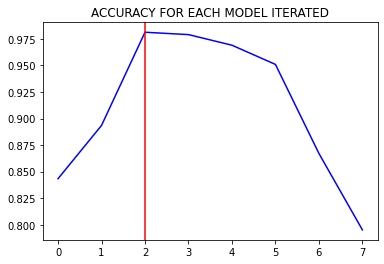

In [ ]:
# VISUALIZATION FOR WHAT X ARGS CREATE MOST ACCURATE MODEL

print(scores)
x_args = pd.DataFrame(scores)
acc_plot = x_args.plot(title="ACCURACY FOR EACH MODEL ITERATED", legend=False, color='blue')
print(x_args.max())
acc_plot.axvline(x=2, color='red')

In [ ]:
# PRINTING ARGUMENTS FOR OPTIMAL ACCURACY

import numpy as np

model_indices = np.argmax(np.asarray((scores)), axis=0)+1
features[:model_indices]

['vote_desc', 'vote_question', 'party_code']

Best x_train arguments are 'vote_desc', 'vote_question', and 'party_code'.

In [ ]:
# OBTAINING A CROSS VALIDATION SCORE USING OPTIMAL X FEATURE MACHINE LEARNING MODEL 

X_train = df_ml[['vote_desc', 'vote_question', 'party_code']]
y_train = df_ml['cast_code']

final_model = make_pipeline(make_column_transformer((TfidfVectorizer(max_features=100), 'vote_desc'),
                                                    (TfidfVectorizer(max_features=100), 'vote_question'),
                                                    (StandardScaler(), ['party_code'])),
                                                    KNeighborsClassifier(n_neighbors = 3,
                                                                         metric='manhattan'))

cross_val_score(final_model, X_train, y_train,
                scoring="accuracy", cv=10).mean()

0.983588799878196

In [ ]:
# HYPERPARAMETER TESTING K VALUES AND DISTANCE METRIC

from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(
    final_model,
    param_grid={
        "kneighborsclassifier__n_neighbors": range(1, 10),
        "kneighborsclassifier__metric": ["euclidean", "manhattan"],
        },
        scoring="accuracy", cv=10)

grid_cv.fit(X_train, y_train)
grid_cv.best_params_

{'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 3}

ANALYSIS OF FINAL MACHINE LEARNING MODEL

In [ ]:
from sklearn.metrics import accuracy_score

# ESTIMATING TEST ERROR

vote_train = df_ml[['vote_desc', 'vote_question', 'party_code', 'cast_code']]
train = vote_train.sample(frac=.5)
val = vote_train.drop(train.index)

X_train = train[['vote_desc', 'vote_question', 'party_code']]
y_train = train['cast_code']

# validation set 
X_val = val[['vote_desc', 'vote_question', 'party_code']]
y_val = val['cast_code']

final_model = make_pipeline(make_column_transformer((TfidfVectorizer(max_features=100), 'vote_desc'),
                                                    (TfidfVectorizer(max_features=100), 'vote_question'),
                                                    (StandardScaler(), ['party_code'])),
                                                    KNeighborsClassifier(n_neighbors = 3,
                                                                         metric='manhattan'))

# test error 
final_model.fit(X_train, y_train)
y_val_ = final_model.predict(X_val)
accuracy_score(y_val, y_val_)

0.9692694510406481

In [ ]:
# CROSS VALIDATION

cross_val_score(final_model,
                X=df_ml[['vote_desc', 'vote_question', 'party_code']],
                y=df_ml['cast_code'],
                scoring="accuracy", cv=10).mean()

0.983588799878196

In [ ]:
# CONFUSION MATRIX-- make sure to do this on the test set not train set 

from sklearn.metrics import confusion_matrix

y_train.value_counts()
final_model.fit(X_train, y_train)
y_train_ = final_model.predict(X_train)

confusion_matrix(y_train, y_train_)

array([[1000,  102],
       [  26, 6032]])

**PRECISION: TP / (TP + FP)** 

*YES*: 6032 / (6032 + 102) = 6032 / 6134 = **0.98337137**

*NO*: 1000 / (1000 + 26) = 1000 / 1026 = **0.97465887**

**RECALL: TP / (TP + FN)**

*YES*: 6032 / (6032 + 26) = 6032 / 6058 = **0.99570815**

*NO*: 1000 / (1000 + 102) = 1000 / 1102 = **0.90744102**

**F1 score: 1 / (1/2)((1/precision) + (1 /recall))**

*YES*: 1 / (1/2)((1/0.98337137) + (1 /0.99570815)) = **0.98951118**

*NO*: 1 / (1/2)((1/0.97465887) + (1 /0.90744102)) = **0.93984962**

Relatively high trustiness of machine learning model as seen by high F1 scores.